In [5]:
!pip install kaggle
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d hojjatk/mnist-dataset

 95%|████████████████████████████████████▏ | 21.0M/22.0M [00:02<00:00, 17.8MB/s]
100%|██████████████████████████████████████| 22.0M/22.0M [00:02<00:00, 8.74MB/s]


In [8]:
import zipfile

# File path
zip_path = "raw_mnist/mnist-dataset.zip"

# List the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()

zip_contents

['t10k-images-idx3-ubyte/t10k-images-idx3-ubyte',
 't10k-images.idx3-ubyte',
 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte',
 't10k-labels.idx1-ubyte',
 'train-images-idx3-ubyte/train-images-idx3-ubyte',
 'train-images.idx3-ubyte',
 'train-labels-idx1-ubyte/train-labels-idx1-ubyte',
 'train-labels.idx1-ubyte']

In [9]:
import os

# Directory to extract the files to
extraction_dir = "raw_mnist/"

# Extract the files from the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_contents:
        if not os.path.dirname(file):  # Check if the file is outside any directory
            zip_ref.extract(file, extraction_dir)

# List the extracted files
extracted_files = os.listdir(extraction_dir)
extracted_files

['mnist-dataset.zip',
 '.ipynb_checkpoints',
 't10k-images.idx3-ubyte',
 't10k-labels.idx1-ubyte',
 'train-images.idx3-ubyte',
 'train-labels.idx1-ubyte']

In [10]:
import numpy as np
import struct

def read_idx_labels(filename):
    """Read MNIST labels from the given IDX formatted file."""
    with open(filename, 'rb') as f:
        # Read the magic number and number of labels
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.int8)
    return labels

def read_idx_images(filename):
    """Read MNIST images from the given IDX formatted file."""
    with open(filename, 'rb') as f:
        # Read the magic number, number of images, rows, and columns
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images

# Load training and test data
train_images = read_idx_images(os.path.join(extraction_dir, 'train-images.idx3-ubyte'))
train_labels = read_idx_labels(os.path.join(extraction_dir, 'train-labels.idx1-ubyte'))
test_images = read_idx_images(os.path.join(extraction_dir, 't10k-images.idx3-ubyte'))
test_labels = read_idx_labels(os.path.join(extraction_dir, 't10k-labels.idx1-ubyte'))

# Checking the shape of the loaded data
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
images  = np.concatenate([train_images,test_images], 0)
labels = np.concatenate([train_labels,test_labels], 0)

In [21]:
labels[0]

5

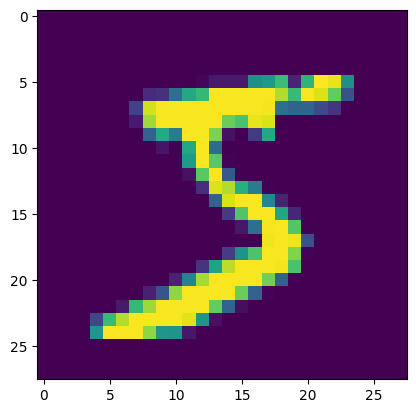

In [20]:
import matplotlib.pyplot as plt

plt.imshow(images[0])

In [23]:
np.save('images_labels/images.npy',images)

In [24]:
np.save('images_labels/labels.npy',labels)

In [35]:
import pandas as pd

metadata = pd.DataFrame(labels, columns = ['labels'])
metadata['index'] = metadata.index

In [37]:
metadata[['index', 'labels']].to_csv('metadatas/metadata.csv', index=False)